In [1]:
pip install tensorflow_datasets

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import tensorflow as td
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import sklearn.preprocessing

/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
(train, test) = tfds.load('mnist', split=['train', 'test'])

In [5]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [18]:
def load_dataset(train_size, test_size):
    train, test = tf.keras.datasets.mnist.load_data()

    # take a sample
    train_idx = np.random.randint(low=0, high=train[0].shape[0], size=train_size)
    test_idx = np.random.randint(low=0, high=test[0].shape[0], size=test_size)
    X_train = train[0][train_idx].reshape(-1,28*28)
    y_train = train[1][train_idx].reshape(-1,1)
    X_test = test[0][test_idx].reshape(-1,28*28)
    y_test = test[1][test_idx].reshape(-1,1)

    scale = StandardScaler()
    X_train = scale.fit_transform(X_train)
    X_test = scale.transform(X_test)

    OH = OneHotEncoder(categories='auto', sparse_output=False)
    y_train = OH.fit_transform(y_train)
    y_test = OH.transform(y_test)

    print('X_train:',X_train.shape)
    print('y_train:',y_train.shape)
    print('X_test:',X_test.shape)
    print('y_test:',y_test.shape)
    print('Min:', X_train.min())
    print('Max:', X_train.max())

    return X_train, X_test, y_train, y_test

In [15]:
import tensorflow as tf
from tensorflow.keras import layers

In [19]:
X_train, X_test, y_train, y_test = load_dataset(60000, 10000)

X_train: (60000, 784)
y_train: (60000, 10)
X_test: (10000, 784)
y_test: (10000, 10)
Min: -1.2715131879394972
Max: 244.9469330286489


In [20]:
def simple_model(initializer, activation='relu'):
    return tf.keras.Sequential([
        layers.Dense(32, activation, input_shape=(784,), kernel_initializer = initializer),
        layers.Dense(32, activation, kernel_initializer = initializer),
        layers.Dense(32, activation, kernel_initializer = initializer),
        layers.Dense(32, activation, kernel_initializer = initializer),
        layers.Dense(10, activation='softmax', kernel_initializer=tf.keras.initializers.glorot_normal())
    ])

In [21]:
init = tf.initializers.zeros()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_zeros = simple_model(init, activate)
model_zeros.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_zeros.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10


/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1067 - loss: 2.3026 - val_accuracy: 0.1188 - val_loss: 2.3025
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1131 - loss: 2.3025 - val_accuracy: 0.1188 - val_loss: 2.3024
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1131 - loss: 2.3025 - val_accuracy: 0.1188 - val_loss: 2.3024
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1114 - loss: 2.3024 - val_accuracy: 0.1188 - val_loss: 2.3023
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1123 - loss: 2.3024 - val_accuracy: 0.1188 - val_loss: 2.3023
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1100 - loss: 2.3024 - val_accuracy: 0.1188 - val_loss: 2.3022
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1110 - loss: 2.3023 - val_accuracy: 0.1188 - val_loss: 2.3021
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1130 - loss: 2.3023 - val_accuracy: 0.1188 - val_loss: 2.3021
Ep

In [22]:
init = tf.initializers.random_normal()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model_normal = simple_model(init, activate)
model_normal.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_normal.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1489 - loss: 2.3016 - val_accuracy: 0.1569 - val_loss: 2.2993
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1440 - loss: 2.2992 - val_accuracy: 0.1435 - val_loss: 2.2964
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1374 - loss: 2.2965 - val_accuracy: 0.1725 - val_loss: 2.2924
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1707 - loss: 2.2918 - val_accuracy: 0.2450 - val_loss: 2.2852
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2337 - loss: 2.2843 - val_accuracy: 0.2715 - val_loss: 2.2713
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2509 - loss: 2.2677 - val_accuracy: 0.2690 - val_loss: 2.2408
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2557 - loss: 2.2299 - val_accuracy: 0.2596 - val_loss: 2.1612
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2437 - loss: 2.1294 - val_accuracy: 0.2574 - val_los

In [23]:
init = tf.initializers.glorot_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model_uniform = simple_model(init, activate)
model_uniform.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_uniform.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1625 - loss: 2.2711 - val_accuracy: 0.4011 - val_loss: 1.9556
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4397 - loss: 1.7959 - val_accuracy: 0.6312 - val_loss: 1.2332
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6653 - loss: 1.1083 - val_accuracy: 0.7824 - val_loss: 0.7832
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7872 - loss: 0.7270 - val_accuracy: 0.8347 - val_loss: 0.5914
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8414 - loss: 0.5490 - val_accuracy: 0.8688 - val_loss: 0.4939
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8711 - loss: 0.4487 - val_accuracy: 0.8808 - val_loss: 0.4430
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8878 - loss: 0.3912 - val_accuracy: 0.8922 - val_loss: 0.3985
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8992 - loss: 0.3514 - val_accuracy: 0.8997 - val_loss

In [24]:
init = tf.initializers.he_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model_uniform = simple_model(init, activate)
model_uniform.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_uniform.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2531 - loss: 2.1224 - val_accuracy: 0.6364 - val_loss: 1.2447
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7031 - loss: 1.0488 - val_accuracy: 0.8058 - val_loss: 0.6550
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8394 - loss: 0.5684 - val_accuracy: 0.8635 - val_loss: 0.4701
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8799 - loss: 0.4156 - val_accuracy: 0.8821 - val_loss: 0.4036
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9003 - loss: 0.3451 - val_accuracy: 0.8942 - val_loss: 0.3673
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9113 - loss: 0.3007 - val_accuracy: 0.9008 - val_loss: 0.3435
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9194 - loss: 0.2759 - val_accuracy: 0.9056 - val_loss: 0.3302
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9268 - loss: 0.2494 - val_accuracy: 0.9080 - val_loss

In [25]:
init = tf.initializers.he_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model_he = simple_model(init, activate)
model_he.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_he.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2366 - loss: 2.1554 - val_accuracy: 0.5978 - val_loss: 1.2859
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6405 - loss: 1.1197 - val_accuracy: 0.7777 - val_loss: 0.7277
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7906 - loss: 0.6745 - val_accuracy: 0.8288 - val_loss: 0.5496
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8381 - loss: 0.5217 - val_accuracy: 0.8548 - val_loss: 0.4652
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8659 - loss: 0.4374 - val_accuracy: 0.8766 - val_loss: 0.4095
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8846 - loss: 0.3852 - val_accuracy: 0.8871 - val_loss: 0.3710
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8980 - loss: 0.3400 - val_accuracy: 0.8978 - val_loss: 0.3416
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9080 - loss: 0.3090 - val_accuracy: 0.9038 - val_loss

Text(0, 0.5, 'validation accuracy')

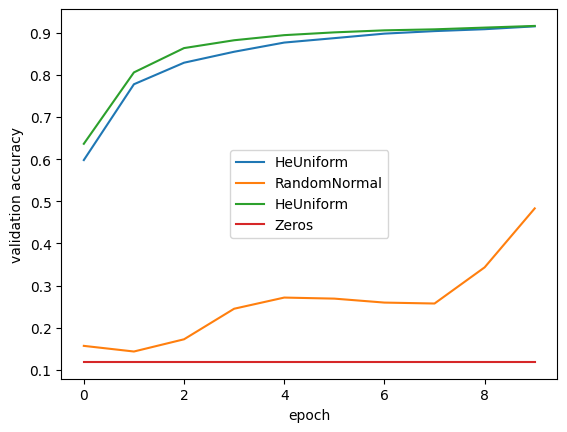

In [26]:
for i in [model_he, model_normal, model_uniform, model_zeros]:
    plt.plot(i.history.history['val_accuracy'], label=i.get_config()['layers'][1]['config']['kernel_initializer']['class_name'])

plt.legend()
plt.xlabel('epoch')
plt.ylabel('validation accuracy')

In [28]:
def simple_model_bn(initializer='he_uniform', activation='relu'):
    return tf.keras.Sequential([
        layers.Dense(32, activation, input_shape=(784,), kernel_initializer=initializer),
        layers.BatchNormalization(trainable=True, scale=True, center=True),
        layers.Dense(32, activation, kernel_initializer=initializer),
        layers.BatchNormalization(trainable=True, scale=True, center=True),
        layers.Dense(32, activation, kernel_initializer=initializer),
        layers.BatchNormalization(trainable=True, scale=True, center=True),
        layers.Dense(32, activation, kernel_initializer=initializer),
        layers.BatchNormalization(trainable=True, scale=True, center=True),
        layers.Dense(10, activation='softmax', kernel_initializer=tf.keras.initializers.glorot_normal())                
    ])

In [29]:
init = tf.initializers.random_normal()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model_bn = simple_model(init, activate)
model_bn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1272 - loss: 2.3016 - val_accuracy: 0.1267 - val_loss: 2.2999
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1180 - loss: 2.2999 - val_accuracy: 0.1215 - val_loss: 2.2985
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1164 - loss: 2.2985 - val_accuracy: 0.1217 - val_loss: 2.2969
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1163 - loss: 2.2972 - val_accuracy: 0.1220 - val_loss: 2.2950
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1178 - loss: 2.2950 - val_accuracy: 0.1236 - val_loss: 2.2924
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1206 - loss: 2.2924 - val_accuracy: 0.1349 - val_loss: 2.2881
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1308 - loss: 2.2877 - val_accuracy: 0.1601 - val_loss: 2.2801
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1705 - loss: 2.2777 - val_accuracy: 0.2587 - val_loss

In [30]:
init = tf.initializers.he_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model_bn = simple_model(init, activate)
model_bn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3175 - loss: 2.0452 - val_accuracy: 0.7274 - val_loss: 0.9400
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7571 - loss: 0.8119 - val_accuracy: 0.8441 - val_loss: 0.5741
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8507 - loss: 0.5142 - val_accuracy: 0.8774 - val_loss: 0.4590
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8835 - loss: 0.3968 - val_accuracy: 0.8936 - val_loss: 0.4003
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9016 - loss: 0.3368 - val_accuracy: 0.9024 - val_loss: 0.3617
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9123 - loss: 0.2992 - val_accuracy: 0.9051 - val_loss: 0.3414
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9218 - loss: 0.2670 - val_accuracy: 0.9117 - val_loss: 0.3205
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9280 - loss: 0.2485 - val_accuracy: 0.9158 - val_loss

In [31]:
init = tf.initializers.he_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.1)
model_bn_ada = simple_model(init, activate)
model_bn_ada.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn_ada.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4537 - loss: 1.7657 - val_accuracy: 0.8493 - val_loss: 0.5249
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8730 - loss: 0.4339 - val_accuracy: 0.8897 - val_loss: 0.3755
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9100 - loss: 0.2991 - val_accuracy: 0.9097 - val_loss: 0.3091
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9306 - loss: 0.2354 - val_accuracy: 0.9189 - val_loss: 0.2795
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9419 - loss: 0.2031 - val_accuracy: 0.9190 - val_loss: 0.2756
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9478 - loss: 0.1778 - val_accuracy: 0.9259 - val_loss: 0.2521
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9516 - loss: 0.1649 - val_accuracy: 0.9293 - val_loss: 0.2455
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9579 - loss: 0.1466 - val_accuracy: 0.9346 - val_loss

In [32]:
init = tf.initializers.he_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
model_bn_ada = simple_model(init, activate)
model_bn_ada.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn_ada.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2018 - loss: 5.7947 - val_accuracy: 0.3459 - val_loss: 1.6156
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4104 - loss: 1.5041 - val_accuracy: 0.4462 - val_loss: 1.3911
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4927 - loss: 1.2768 - val_accuracy: 0.5801 - val_loss: 1.0986
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6009 - loss: 1.0303 - val_accuracy: 0.6497 - val_loss: 0.9657
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6541 - loss: 0.9040 - val_accuracy: 0.6286 - val_loss: 0.9378
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6767 - loss: 0.8525 - val_accuracy: 0.7059 - val_loss: 0.8351
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7043 - loss: 0.7915 - val_accuracy: 0.7258 - val_loss: 0.7864
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7177 - loss: 0.7758 - val_accuracy: 0.7182 - val_loss

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
init = tf.keras.initializers.he_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

history = model_bn_adam.fit(X_train, y_train, epochs=2000, callbacks=[es], validation_data=(X_test, y_test), verbose=1)

_, train_acc = model_bn_adam.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_bn_adam.evaluate(X_train, y_train, verbose=0)
print('Train Acc:', train_acc, 'Test Acc:', test_acc)

Epoch 1/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 626us/step - accuracy: 0.8371 - loss: 0.5290 - val_accuracy: 0.9371 - val_loss: 0.2243
Epoch 2/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 513us/step - accuracy: 0.9339 - loss: 0.2144 - val_accuracy: 0.9480 - val_loss: 0.1834
Epoch 3/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 557us/step - accuracy: 0.9495 - loss: 0.1662 - val_accuracy: 0.9559 - val_loss: 0.1505
Epoch 4/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 549us/step - accuracy: 0.9577 - loss: 0.1383 - val_accuracy: 0.9594 - val_loss: 0.1434
Epoch 5/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 541us/step - accuracy: 0.9636 - loss: 0.1191 - val_accuracy: 0.9624 - val_loss: 0.1327
Epoch 6/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 555us/step - accuracy: 0.9672 - loss: 0.1059 - val_accuracy: 0.9599 - val_loss: 0.1450
Epoch 7/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 569us/step - accuracy: 0.9690 - loss: 0.0982 - val_accuracy: 0.9590 - val_loss: 0.1514
Epoch 8/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 552us/step - ac